In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score,recall_score,classification_report
from sklearn.model_selection import GridSearchCV
df = pd.read_csv("F:\\Insomnia\\Insomniac_data.csv")
import matplotlib.pyplot as plt

In [2]:
df

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,মোঃ এছাম,2.0,No,Yes,No,No,Yes,25.0,No,Yes,1
1,Rakibul Islam Roki,6.0,No,Yes,No,No,Yes,5.0,Yes,No,1
2,Farhana Afrin Trina,5.0,No,Yes,No,No,Yes,12.0,No,Yes,1
3,Umme Salma,6.0,No,Yes,Yes,No,No,1.0,Yes,No,1
4,Israfil,6.0,No,Yes,Yes,No,Yes,4.0,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...
415,NaN,9.0,Yes,No,No,Yes,Yes,0.0,No,No,0
416,NaN,5.0,Yes,No,No,Yes,Yes,0.0,No,No,0
417,NaN,8.5,Yes,No,No,Yes,Yes,0.0,No,No,0
418,NaN,9.0,Yes,No,No,Yes,Yes,0.0,Yes,No,0


# Splitting dataset into 2 catagories

In [3]:
dfI = df[df["Disorder"]==1]

In [4]:
dfN = df[df["Disorder"]==0]

In [5]:
dfI

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,মোঃ এছাম,2.0,No,Yes,No,No,Yes,25.0,No,Yes,1
1,Rakibul Islam Roki,6.0,No,Yes,No,No,Yes,5.0,Yes,No,1
2,Farhana Afrin Trina,5.0,No,Yes,No,No,Yes,12.0,No,Yes,1
3,Umme Salma,6.0,No,Yes,Yes,No,No,1.0,Yes,No,1
4,Israfil,6.0,No,Yes,Yes,No,Yes,4.0,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...
205,Shakil,3.0,No,Yes,Yes,Yes,Yes,3.0,Yes,Yes,1
206,Mahmudul,5.0,No,Yes,Yes,No,Yes,10.0,No,Yes,1
207,Fahad,5.0,No,Yes,Yes,No,Yes,7.0,Yes,No,1
208,NaN,1.5,No,Yes,Yes,No,Yes,3.5,Yes,No,1


In [6]:
dfN

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
210,Nittanondo,6.0,No,No,No,Yes,No,0.0,No,No,0
211,mozammel,5.0,Yes,No,No,No,No,0.0,No,No,0
212,Nowshad,7.0,Yes,No,No,No,No,0.0,No,No,0
213,Mehedi,7.0,Yes,Yes,No,No,Yes,4.0,No,No,0
214,Zarif,8.0,Yes,Yes,No,No,No,0.0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
415,NaN,9.0,Yes,No,No,Yes,Yes,0.0,No,No,0
416,NaN,5.0,Yes,No,No,Yes,Yes,0.0,No,No,0
417,NaN,8.5,Yes,No,No,Yes,Yes,0.0,No,No,0
418,NaN,9.0,Yes,No,No,Yes,Yes,0.0,Yes,No,0


# Data analysis

In [7]:
dfI[dfI['Satisfaction_of_sleep']=='No']

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,মোঃ এছাম,2.0,No,Yes,No,No,Yes,25.0,No,Yes,1
1,Rakibul Islam Roki,6.0,No,Yes,No,No,Yes,5.0,Yes,No,1
2,Farhana Afrin Trina,5.0,No,Yes,No,No,Yes,12.0,No,Yes,1
3,Umme Salma,6.0,No,Yes,Yes,No,No,1.0,Yes,No,1
4,Israfil,6.0,No,Yes,Yes,No,Yes,4.0,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...
205,Shakil,3.0,No,Yes,Yes,Yes,Yes,3.0,Yes,Yes,1
206,Mahmudul,5.0,No,Yes,Yes,No,Yes,10.0,No,Yes,1
207,Fahad,5.0,No,Yes,Yes,No,Yes,7.0,Yes,No,1
208,NaN,1.5,No,Yes,Yes,No,Yes,3.5,Yes,No,1


In [8]:
dfN[dfN['Satisfaction_of_sleep']=='Yes']

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
211,mozammel,5.0,Yes,No,No,No,No,0.0,No,No,0
212,Nowshad,7.0,Yes,No,No,No,No,0.0,No,No,0
213,Mehedi,7.0,Yes,Yes,No,No,Yes,4.0,No,No,0
214,Zarif,8.0,Yes,Yes,No,No,No,0.0,No,No,0
215,Abul bashar,7.0,Yes,Yes,No,No,No,0.0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...
415,NaN,9.0,Yes,No,No,Yes,Yes,0.0,No,No,0
416,NaN,5.0,Yes,No,No,Yes,Yes,0.0,No,No,0
417,NaN,8.5,Yes,No,No,Yes,Yes,0.0,No,No,0
418,NaN,9.0,Yes,No,No,Yes,Yes,0.0,Yes,No,0


In [9]:
dfI[dfI['Wakeup_frequently_during_sleep']=='Yes']

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
3,Umme Salma,6.0,No,Yes,Yes,No,No,1.0,Yes,No,1
4,Israfil,6.0,No,Yes,Yes,No,Yes,4.0,No,No,1
5,Arnaf,4.0,No,Yes,Yes,No,Yes,7.0,Yes,Yes,1
7,Ashrity,2.0,No,Yes,Yes,No,Yes,3.0,No,No,1
9,রাইদা,3.0,No,Yes,Yes,No,No,0.7,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
205,Shakil,3.0,No,Yes,Yes,Yes,Yes,3.0,Yes,Yes,1
206,Mahmudul,5.0,No,Yes,Yes,No,Yes,10.0,No,Yes,1
207,Fahad,5.0,No,Yes,Yes,No,Yes,7.0,Yes,No,1
208,NaN,1.5,No,Yes,Yes,No,Yes,3.5,Yes,No,1


In [10]:
dfI[dfI[['Late_night_sleep','Wakeup_frequently_during_sleep']]=='Yes']

,Name,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep,Disorder
0,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
205,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
206,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
207,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
208,NaN,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dfI.fillna('X',inplace= True)
dfN.fillna('Y',inplace= True)


C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


# Plotting graph

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2459 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 2494 missing from current font.

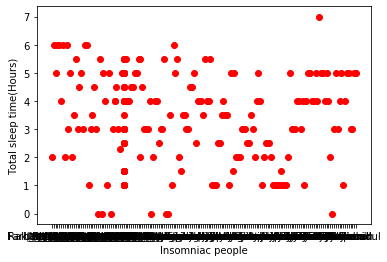

In [12]:
%matplotlib inline
plt.xlabel('Insomniac people')
plt.ylabel('Total sleep time(Hours)')
plt.scatter(dfI.Name,dfI.Total_sleep_time,color='red')

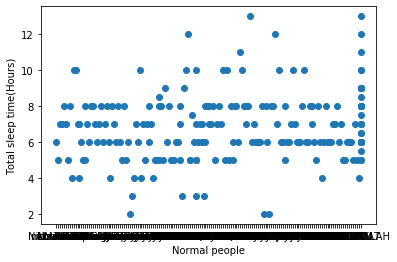

In [14]:
plt.xlabel('Normal people')
plt.ylabel('Total sleep time(Hours)')
plt.scatter(dfN.Name,dfN.Total_sleep_time)

# Model creation start

In [16]:
x= df.drop(["Disorder","Name"],axis=1)
y= df["Disorder"]

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
415    0
416    0
417    0
418    0
419    0
Name: Disorder, Length: 420, dtype: int64

In [18]:
x

,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep
0,2.0,No,Yes,No,No,Yes,25.0,No,Yes
1,6.0,No,Yes,No,No,Yes,5.0,Yes,No
2,5.0,No,Yes,No,No,Yes,12.0,No,Yes
3,6.0,No,Yes,Yes,No,No,1.0,Yes,No
4,6.0,No,Yes,Yes,No,Yes,4.0,No,No
...,...,...,...,...,...,...,...,...,...
415,9.0,Yes,No,No,Yes,Yes,0.0,No,No
416,5.0,Yes,No,No,Yes,Yes,0.0,No,No
417,8.5,Yes,No,No,Yes,Yes,0.0,No,No
418,9.0,Yes,No,No,Yes,Yes,0.0,Yes,No


In [19]:
l = LabelEncoder()

In [20]:
x['Satisfaction_of_sleep'] =l.fit_transform(x['Satisfaction_of_sleep'])
x['Late_night_sleep'] =l.fit_transform(x['Late_night_sleep'])
x['Wakeup_frequently_during_sleep'] =l.fit_transform(x['Wakeup_frequently_during_sleep'])
x['Sleep_at_daytime'] =l.fit_transform(x['Sleep_at_daytime'])
x['Drowsiness_tiredness'] =l.fit_transform(x['Drowsiness_tiredness'])
x['Recent_psychological_attack'] =l.fit_transform(x['Recent_psychological_attack'])
x['Afraid_of_getting_asleep'] =l.fit_transform(x['Afraid_of_getting_asleep'])

In [21]:
x

,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep
0,2.0,0,1,0,0,1,25.0,0,1
1,6.0,0,1,0,0,1,5.0,1,0
2,5.0,0,1,0,0,1,12.0,0,1
3,6.0,0,1,1,0,0,1.0,1,0
4,6.0,0,1,1,0,1,4.0,0,0
...,...,...,...,...,...,...,...,...,...
415,9.0,1,0,0,1,1,0.0,0,0
416,5.0,1,0,0,1,1,0.0,0,0
417,8.5,1,0,0,1,1,0.0,0,0
418,9.0,1,0,0,1,1,0.0,1,0


In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y ,test_size = 0.2)
x_train

,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep
367,7.0,0,1,0,0,1,0.0,0,0
365,8.0,1,0,0,0,0,0.0,0,0
42,1.5,0,0,1,0,1,2.5,1,1
353,6.0,1,1,0,0,1,0.1,0,0
213,7.0,1,1,0,0,1,4.0,0,0
...,...,...,...,...,...,...,...,...,...
258,8.0,1,1,0,0,0,0.0,0,0
149,5.0,0,1,1,0,1,0.7,1,0
303,5.0,0,1,1,0,1,1.0,0,0
110,1.5,0,1,1,0,1,4.0,0,1


In [23]:
y_train

367    0
365    0
42     1
353    0
213    0
      ..
258    0
149    1
303    0
110    1
112    1
Name: Disorder, Length: 336, dtype: int64

In [24]:
x_train

,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep
367,7.0,0,1,0,0,1,0.0,0,0
365,8.0,1,0,0,0,0,0.0,0,0
42,1.5,0,0,1,0,1,2.5,1,1
353,6.0,1,1,0,0,1,0.1,0,0
213,7.0,1,1,0,0,1,4.0,0,0
...,...,...,...,...,...,...,...,...,...
258,8.0,1,1,0,0,0,0.0,0,0
149,5.0,0,1,1,0,1,0.7,1,0
303,5.0,0,1,1,0,1,1.0,0,0
110,1.5,0,1,1,0,1,4.0,0,1


# Model initialization

In [124]:
model = SVC(C= 1, kernel='linear')
tr = tree.DecisionTreeClassifier(criterion= 'gini', min_samples_split= 3)
lr = LinearRegression()
lor = LogisticRegression(C= 1.0, max_iter= 50, solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=3,leaf_size= 30, p= 2)
rfc = RandomForestClassifier(n_estimators=60,min_samples_leaf= 1)
km = KMeans(n_clusters=3)
nb = GaussianNB()
sgd = SGDClassifier(max_iter= 900, penalty= 'l1', power_t= 0.4)

In [125]:
model.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [126]:
model.score(x_test,y_test)

0.9880952380952381

In [127]:
tr.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [128]:
tr.score(x_test,y_test)

0.9404761904761905

In [129]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
lr.score(x_test,y_test)

0.7998384508640931

In [131]:
lor.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
lor.score(x_test,y_test)

0.9880952380952381

In [133]:
x_test

,Total_sleep_time,Satisfaction_of_sleep,Late_night_sleep,Wakeup_frequently_during_sleep,Sleep_at_daytime,Drowsiness_tiredness,Duration_of_this_problems,Recent_psychological_attack,Afraid_of_getting_asleep
266,5.0,1,0,0,0,0,0.0,0,1
142,1.0,0,1,1,1,1,0.8,0,1
34,4.0,0,1,1,0,0,7.0,1,1
291,6.0,0,1,0,0,0,2.0,1,0
374,8.0,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
159,1.5,0,1,1,0,1,2.0,1,0
129,4.0,0,1,1,0,1,2.5,0,1
218,4.0,1,1,0,0,0,0.0,1,0
125,2.5,0,1,1,0,1,3.0,1,1


In [134]:
model.predict([[6,0,0,1,0,1,3,0,0]])

array([0], dtype=int64)

In [136]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [137]:
knn.score(x_test,y_test)

0.9285714285714286

In [138]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
rfc.score(x_test,y_test)

0.9761904761904762

rfc.score(x_test,y_test)

In [141]:
km.fit(x_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
km.score(x_test,y_test)

-582.9530608098577

In [143]:
nb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
nb.score(x_test,y_test)

0.8809523809523809

In [145]:
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=900, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.4, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
sgd.score(x_test,y_test)

0.9642857142857143

# Cross validation start

In [147]:
modelv = cross_val_score(model,x,y,cv=10,scoring="accuracy")

In [148]:
print(modelv.mean())

0.9476190476190476


In [149]:
sgdv = cross_val_score(model,x,y,cv=10,scoring="accuracy")

In [150]:
print(sgdv.mean())

0.9476190476190476


In [151]:
trv = cross_val_score(tr,x,y,cv=10,scoring="accuracy")

In [152]:
print(trv.mean())

0.9333333333333333


In [153]:
lorv = cross_val_score(lor,x,y,cv=10,scoring="accuracy")

In [154]:
print(lorv.mean())

0.9595238095238094


In [157]:
knnv = cross_val_score(knn,x,y,cv=10,scoring="accuracy")

In [158]:
print(knnv.mean())

0.9476190476190476


In [159]:
rfcv = cross_val_score(rfc,x,y,cv=10,scoring="accuracy")

In [160]:
print(rfcv.mean())

0.9428571428571428


In [161]:
kmv = cross_val_score(km,x,y,cv=10,scoring="accuracy")

In [162]:
print(kmv.mean())

0.5071428571428571


In [163]:
nbv = cross_val_score(nb,x,y,cv=10,scoring="accuracy")

In [164]:
print(nbv.mean())

0.8880952380952382


# Classification report

In [165]:
y_pred = model.predict(x_test)

In [166]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int64)

In [167]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.97      0.99        38

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [169]:
y_pred = tr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.92      0.95      0.94        38

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



In [170]:
y_pred = knn.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        46
           1       0.90      0.95      0.92        38

    accuracy                           0.93        84
   macro avg       0.93      0.93      0.93        84
weighted avg       0.93      0.93      0.93        84



In [171]:
y_pred = km.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        46
           1       0.04      0.05      0.05        38
           2       0.00      0.00      0.00         0

    accuracy                           0.02        84
   macro avg       0.01      0.02      0.02        84
weighted avg       0.02      0.02      0.02        84



C:\Users\USER\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [172]:
y_pred = nb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        46
           1       0.79      1.00      0.88        38

    accuracy                           0.88        84
   macro avg       0.90      0.89      0.88        84
weighted avg       0.91      0.88      0.88        84



In [173]:
y_pred = lor.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.97      0.99        38

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [174]:
y_pred = sgd.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        46
           1       1.00      0.92      0.96        38

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.97      0.96      0.96        84



# Hyper parameter tuning

In [82]:
parameters =[{'C':[1,10,100,1000],'kernel':['linear']},
        
             {'C':[1,10,100,1000],'kernel':['rbf']}]
model_search= GridSearchCV(estimator=model,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

model_search = model_search.fit(x_train,y_train)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
dff = pd.DataFrame(model_search.cv_results_)
dff[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,linear,0.964286
1,10,linear,0.955357
2,100,linear,0.955357
3,1000,linear,0.952381
4,1,rbf,0.949405
5,10,rbf,0.952381
6,100,rbf,0.922619
7,1000,rbf,0.922619


In [108]:
model_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [97]:
parameters =[{'min_samples_split':[2,3,4,5],'criterion':['gini']},
        
             {'min_samples_split':[2,3,4,5],'criterion':['entropy']}]
tr_search= GridSearchCV(estimator=tr,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

tr_search = tr_search.fit(x_train,y_train)

dff = pd.DataFrame(tr_search.cv_results_)
dff[['param_criterion','param_min_samples_split','mean_test_score']]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_criterion,param_min_samples_split,mean_test_score
0,gini,2,0.934524
1,gini,3,0.937500
2,gini,4,0.925595
3,gini,5,0.922619
4,entropy,2,0.937500
5,entropy,3,0.931548
6,entropy,4,0.928571
7,entropy,5,0.919643


In [106]:
tr_search.best_params_

{'criterion': 'gini', 'min_samples_split': 3}

In [100]:
parameters =[{'max_iter':[50,100,150,200],'C':[1.0,2.0,3.0,4.0],'solver':['liblinear']},
        
             {'max_iter':[50,100,150,200],'C':[1.0,2.0,3.0,4.0],'solver':['lbfgs']}]
lor_search= GridSearchCV(estimator=lor,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

lor_search = lor_search.fit(x_train,y_train)

dff = pd.DataFrame(lor_search.cv_results_)
dff[['param_C','param_max_iter','param_solver','mean_test_score']]

,param_C,param_max_iter,param_solver,mean_test_score
0,1,50,liblinear,0.964286
1,1,100,liblinear,0.964286
2,1,150,liblinear,0.964286
3,1,200,liblinear,0.964286
4,2,50,liblinear,0.964286
5,2,100,liblinear,0.964286
6,2,150,liblinear,0.964286
7,2,200,liblinear,0.964286
8,3,50,liblinear,0.964286
9,3,100,liblinear,0.964286


In [101]:
lor_search.best_params_

{'C': 1.0, 'max_iter': 50, 'solver': 'liblinear'}

In [103]:
parameters =[{'n_neighbors':[3,5,7,9],'leaf_size':[30,50,70],'p':[2,4,6,8]},
        
             {'n_neighbors':[3,5,7,9],'leaf_size':[30,50,70],'p':[10,12,14,16]}]
knn_search= GridSearchCV(estimator=knn,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

knn_search = knn_search.fit(x_train,y_train)

dff = pd.DataFrame(knn_search.cv_results_)
dff[['param_n_neighbors','param_leaf_size','param_p','mean_test_score']]

,param_n_neighbors,param_leaf_size,param_p,mean_test_score
0,3,30,2,0.961310
1,3,30,4,0.961310
2,3,30,6,0.961310
3,3,30,8,0.961310
4,5,30,2,0.946429
...,...,...,...,...
91,7,70,16,0.931548
92,9,70,10,0.928571
93,9,70,12,0.928571
94,9,70,14,0.928571


In [104]:
knn_search.best_params_

{'leaf_size': 30, 'n_neighbors': 3, 'p': 2}

In [110]:
parameters =[{'n_estimators':[10,20,30,40,50],'min_samples_leaf':[1,2,3]},
        
             {'n_estimators':[60,70,80,90,100],'min_samples_leaf':[1,2,3]}]
rfc_search= GridSearchCV(estimator=rfc,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

rfc_search = rfc_search.fit(x_train,y_train)

dff = pd.DataFrame(rfc_search.cv_results_)
dff[['param_n_estimators','param_min_samples_leaf','mean_test_score']]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_n_estimators,param_min_samples_leaf,mean_test_score
0,10,1,0.946429
1,20,1,0.961310
2,30,1,0.949405
3,40,1,0.955357
4,50,1,0.958333
5,10,2,0.943452
6,20,2,0.946429
7,30,2,0.946429
8,40,2,0.946429
9,50,2,0.952381


In [111]:
rfc_search.best_params_

{'min_samples_leaf': 1, 'n_estimators': 60}

In [114]:
parameters =[{'n_clusters':[1,2,3,4],'max_iter':[100,200,300]},
        
             {'n_clusters':[5,6,7,8],'max_iter':[100,200,300]}]
km_search= GridSearchCV(estimator=km,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)
km_search = km_search.fit(x_train,y_train)

dff = pd.DataFrame(km_search.cv_results_)
dff[['param_n_clusters','param_max_iter','mean_test_score']]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_n_clusters,param_max_iter,mean_test_score
0,1,100,0.488095
1,2,100,0.633929
2,3,100,0.294643
3,4,100,0.199405
4,1,200,0.488095
5,2,200,0.586310
6,3,200,0.380952
7,4,200,0.235119
8,1,300,0.488095
9,2,300,0.547619


In [118]:
parameters =[{'penalty':['l2', 'l1', 'elasticnet'],'max_iter':[800,900,1000],'power_t':[0.3,0.4,0.5]},
        
             {'penalty':['l2', 'l1', 'elasticnet'],'max_iter':[500,600,700],'power_t':[0.6,0.7,0.8]}]
sgd_search= GridSearchCV(estimator=sgd,
                          param_grid=parameters,
                          scoring='accuracy',
                          cv=10,
                          n_jobs=-1)

sgd_search = sgd_search.fit(x_train,y_train)

dff = pd.DataFrame(sgd_search.cv_results_)
dff[['param_penalty','param_max_iter','param_power_t','mean_test_score']]

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,param_penalty,param_max_iter,param_power_t,mean_test_score
0,l2,800,0.3,0.958333
1,l2,800,0.4,0.946429
2,l2,800,0.5,0.946429
3,l1,800,0.3,0.955357
4,l1,800,0.4,0.952381
5,l1,800,0.5,0.958333
6,elasticnet,800,0.3,0.934524
7,elasticnet,800,0.4,0.952381
8,elasticnet,800,0.5,0.925595
9,l2,900,0.3,0.943452


In [119]:
sgd_search.best_params_

{'max_iter': 900, 'penalty': 'l1', 'power_t': 0.4}